In [15]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import dateutil
import datetime as dt
%matplotlib inline

In [7]:
phones = pd.read_csv('phone_data.csv', index_col='index')
phones.head()

,date,duration,item,month,network,network_type
index,,,,,,
0,15/10/14 06:58,34.429,data,2014-11,data,data
1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [8]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 0 to 829
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          830 non-null    object 
 1   duration      830 non-null    float64
 2   item          830 non-null    object 
 3   month         830 non-null    object 
 4   network       830 non-null    object 
 5   network_type  830 non-null    object 
dtypes: float64(1), object(5)
memory usage: 45.4+ KB


In [12]:
for col in ['item', 'network', 'network_type']:
    print(phones[col].value_counts(dropna=False))

call    388
sms     292
data    150
Name: item, dtype: int64
Three        215
Vodafone     215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
world          7
special        3
Name: network, dtype: int64
mobile       601
data         150
landline      42
voicemail     27
world          7
special        3
Name: network_type, dtype: int64


In [10]:
phones.describe()

,duration
count,830.000000
mean,117.804036
std,444.129560
min,1.000000
25%,1.000000
50%,24.500000
75%,55.000000
max,10528.000000


In [22]:
#Convert date form from string to datetime, method 1
#phones.date.apply(lambda x: dt.datetime.strptime(x, "%y/%m/%d %H:%M")).dt.strftime("%Y")
phones['date'] = phones.date.apply(dateutil.parser.parse, dayfirst = True)
phones.head()

,date,duration,item,month,network,network_type
index,,,,,,
0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [26]:
phones.shape[0]
phones.item.count()

830

In [27]:
phones.duration.max()

10528.0

In [28]:
phones.loc[phones.item == 'call', 'duration'].sum()

92321.0

In [30]:
phones.month.value_counts()

2014-11    230
2015-01    205
2014-12    157
2015-02    137
2015-03    101
Name: month, dtype: int64

In [34]:
len(phones.network.unique())
phones.network.nunique()

9

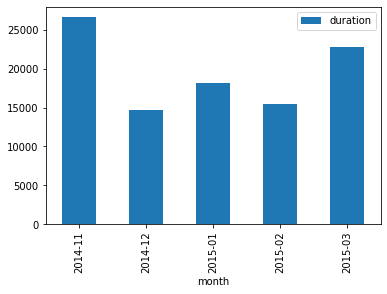

In [38]:
phones.pivot_table(index = 'month', values='duration',aggfunc=np.sum).plot.bar()

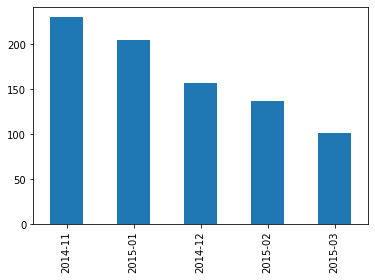

In [39]:
phones.month.value_counts().plot.bar()

In [42]:
phones.groupby('month').describe()

duration                                                            
           count        mean          std  min  25%     50%     75%      max
month                                                                       
2014-11    230.0  115.823657   287.548051  1.0  1.0   4.000   36.75   1940.0
2014-12    157.0   93.260318   243.151296  1.0  1.0  28.000   55.00   2120.0
2015-01    205.0   88.894141   216.853383  1.0  1.0   6.000   41.00   1859.0
2015-02    137.0  113.301453   250.778963  1.0  1.0  34.429   82.00   1863.0
2015-03    101.0  225.251891  1076.018287  1.0  2.0  34.429  106.00  10528.0

In [44]:
phones.groupby('month').groups.keys()

dict_keys(['2014-11', '2014-12', '2015-01', '2015-02', '2015-03'])

In [46]:
len(phones.groupby('month').groups['2014-11'])

230

In [47]:
phones.groupby('month').first()

,date,duration,item,network,network_type
month,,,,,
2014-11,2014-10-15 06:58:00,34.429,data,data,data
2014-12,2014-11-13 06:58:00,34.429,data,data,data
2015-01,2014-12-13 06:58:00,34.429,data,data,data
2015-02,2015-01-13 06:58:00,34.429,data,data,data
2015-03,2015-02-12 20:15:00,69.000,call,landline,landline


In [48]:
phones.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [49]:
phones.groupby('month')['date'].count()

month
2014-11    230
2014-12    157
2015-01    205
2015-02    137
2015-03    101
Name: date, dtype: int64

In [50]:
phones[phones.item == 'call'].groupby('network')['duration'].sum()

network
Meteor        7200.0
Tesco        13828.0
Three        36464.0
Vodafone     14621.0
landline     18433.0
voicemail     1775.0
Name: duration, dtype: float64

In [53]:
# How many calls, sms, and data entries are in each month
phones.groupby(['month', 'item'])['date'].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, dtype: int64

In [55]:
# How many calls, texts, and data are sent per month, split by network_type?
phones.groupby(['month', 'network_type']).count()

date  duration  item  network
month   network_type                               
2014-11 data            29        29    29       29
        landline         5         5     5        5
        mobile         189       189   189      189
        special          1         1     1        1
        voicemail        6         6     6        6
2014-12 data            30        30    30       30
        landline         7         7     7        7
        mobile         108       108   108      108
        voicemail        8         8     8        8
        world            4         4     4        4
2015-01 data            31        31    31       31
        landline        11        11    11       11
        mobile         160       160   160      160
        voicemail        3         3     3        3
2015-02 data            31        31    31       31
        landline         8         8     8        8
        mobile          90        90    90       90
        special          2         2     2        2
        voicemail        6         6     6        6
2015-03 data            29        29    29       29
        landline        11        11    11       11
        mobile          54        54    54       54
        voicemail        4         4     4        4
        world            3         3     3        3

In [56]:
phones.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [57]:
phones.groupby('month')[['duration']].sum()

,duration
month,
2014-11,26639.441
2014-12,14641.870
2015-01,18223.299
2015-02,15522.299
2015-03,22750.441


In [60]:
phones.groupby('month', as_index=False).agg({'duration': 'sum'})
# Do not use groupby column as index

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [59]:
phones.groupby('month').agg({'duration':'sum'})

,duration
month,
2014-11,26639.441
2014-12,14641.870
2015-01,18223.299
2015-02,15522.299
2015-03,22750.441


## Multiple Statistics per Group

In [61]:
phones.groupby(['month', 'item'])['duration'].agg(sum)

month    item
2014-11  call    25547.000
         data      998.441
         sms        94.000
2014-12  call    13561.000
         data     1032.870
         sms        48.000
2015-01  call    17070.000
         data     1067.299
         sms        86.000
2015-02  call    14416.000
         data     1067.299
         sms        39.000
2015-03  call    21727.000
         data      998.441
         sms        25.000
Name: duration, dtype: float64

In [68]:
phones.groupby(['month', 'item']).agg({'duration':sum, 'network_type':'count', 'date': 'first'})

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [72]:
# Define the aggregation procedure outside of the groupby operation
aggregations = {'duration':'sum', 'date':lambda x: max(x)}
phones.groupby('month').agg(aggregations)

,duration,date
month,,
2014-11,26639.441,2014-11-13 22:31:00
2014-12,14641.870,2014-12-14 19:54:00
2015-01,18223.299,2015-01-14 23:36:00
2015-02,15522.299,2015-02-12 06:58:00
2015-03,22750.441,2015-03-14 00:16:00


In [73]:
# Group the data frame by month and item and extract a number of stats from each group
phones.groupby(['month', 'item']).agg({
    'duration': [min, max, sum],
    'network_type' : 'count',
    'date': [min, 'first', 'nunique']
})

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
        sms     1.000      1.000     48.000           48 2014-11-14 17:28:00   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15 20:03:00   
        data   34.429     34.429   1067.299           31 2014-12-13 06:58:00   
        sms     1.000      1.000     86.000           86 2014-12-15 19:56:00   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-15 10:36:00   
        data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-02-12 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
        sms  2014-11-14 17:28:00      41  
2015-01 call 2014-12-15 20:03:00      84  
        data 2014-12-13 06:58:00      31  
        sms  2014-12-15 19:56:00      58  
2015-02 call 2015-01-15 10:36:00      67  
        data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-02-12 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17

## Renaming grouped aggregation columns
* 2 methods

In [74]:
phones[phones.item == 'call'].groupby('month').agg(
max_duration = ('duration', max),
min_duration = ('duration', min),
total_duration = ('duration', sum),
num_days = ('date', lambda x: (max(x) - min(x)).days))

,max_duration,min_duration,total_duration,num_days
month,,,,
2014-11,1940.0,1.0,25547.0,28
2014-12,2120.0,2.0,13561.0,30
2015-01,1859.0,2.0,17070.0,30
2015-02,1863.0,1.0,14416.0,25
2015-03,10528.0,2.0,21727.0,19


In [76]:
phones[phones.item == 'call'].groupby('month').agg(
max_duration = pd.NamedAgg(column = 'duration', aggfunc=max),
min_duraion = pd.NamedAgg(column = 'duration', aggfunc = min),
total_duration = pd.NamedAgg(column = 'duration', aggfunc = sum),
num_days = pd.NamedAgg(column = 'date', aggfunc = lambda x: (max(x) - min(x)).days))

,max_duration,min_duraion,total_duration,num_days
month,,,,
2014-11,1940.0,1.0,25547.0,28
2014-12,2120.0,2.0,13561.0,30
2015-01,1859.0,2.0,17070.0,30
2015-02,1863.0,1.0,14416.0,25
2015-03,10528.0,2.0,21727.0,19
